The objective is to create a model to classify the scans as fraudulent or non-fraudulent. The classification does not take into account whether the fraud was committed intentionally or inadvertently.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Import model library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_score
#Import library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip "/content/DMC_2019_task.zip" -d  "/content" 

Archive:  /content/DMC_2019_task.zip
replace /content/DMC_2019_task/DATA-MINING-CUP-2019-features.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/DMC_2019_task/DATA-MINING-CUP-2019-features.pdf  
  inflating: /content/DMC_2019_task/DATA-MINING-CUP-2019-task.pdf  
  inflating: /content/DMC_2019_task/test.csv  
  inflating: /content/DMC_2019_task/train.csv  


In [ ]:
df = pd.read_csv('/content/DMC_2019_task/train.csv',sep='|')
df

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


##Exploration

###Check missing values

In [ ]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


Dengan menggunakan describe function pada pandas, kita dapat melihat jumlah data dan nilai minimum data untuk melihat apakah ada missing value. Dapat dilihat bahwa count data setiap kolom jumlahnya sesuai dengan jumlah data train yaitu sebanyak 1879 baris. Pada nilai minimum tiap kolom ada beberapa yang memiliki nilai 0, namun itu bukanlah missing value karena pada deskripsi data
dijelaskan bahwa kolom tersebut memang dapat berisi nilai 0. Setelah dilakukan eksplorasi pada data, tidak terdapat missing value pada data. Sehingga tidak perlu dilakukan imputation. 


In [ ]:
#datatype for each column
df.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object

###Check distribution

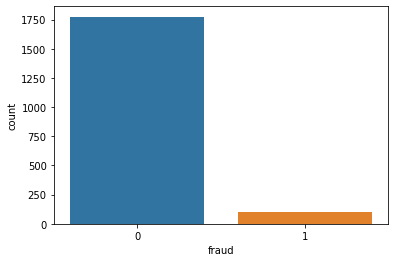

In [ ]:
sns.countplot(x = 'fraud', data = df)

Distribusi kelas pada fraud sangat tidak seimbang (imbalance data). Sehingga untuk pengukuran matrik evaluasi nanti perlu diperhatikan, sebaiknya tidak menggunakan akurasi.

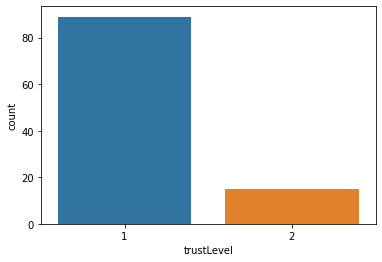

In [ ]:
sns.countplot(x = 'trustLevel', data = df[df.fraud == 1])

Dari data dapat dilihat bahwa data pembelian yang dikategorikan sebagai fraud merupakan data dengan trustLevel 0 dan 1.

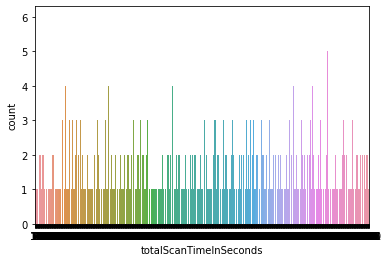

In [ ]:
sns.countplot(x = 'totalScanTimeInSeconds', data = df)

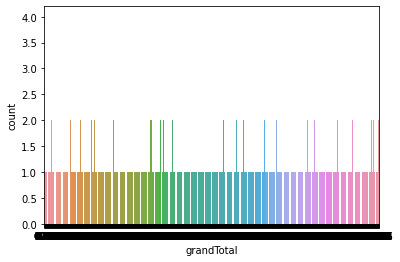

In [ ]:
sns.countplot(x = 'grandTotal', data = df)

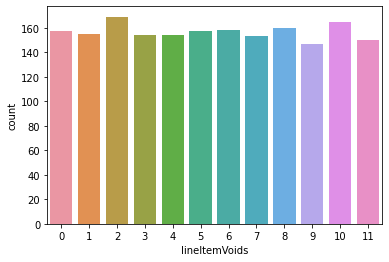

In [ ]:
sns.countplot(x = 'lineItemVoids', data = df)

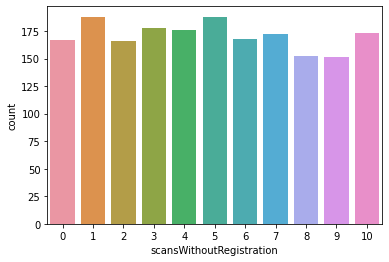

In [ ]:
sns.countplot(x = 'scansWithoutRegistration', data = df)

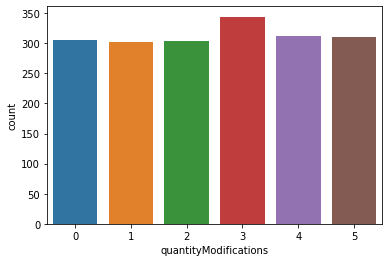

In [ ]:
sns.countplot(x = 'quantityModifications', data = df)

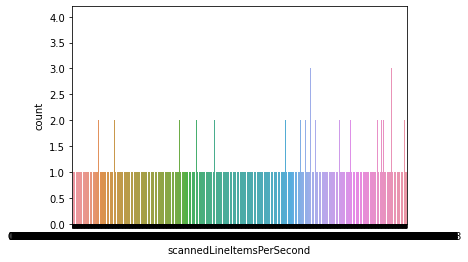

In [ ]:
sns.countplot(x = 'scannedLineItemsPerSecond', data = df)

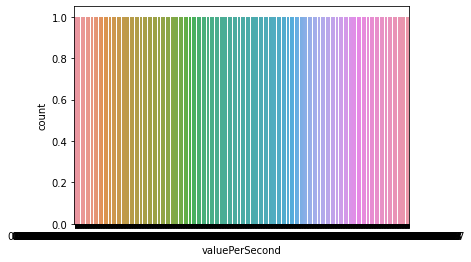

In [ ]:
sns.countplot(x = 'valuePerSecond', data = df)

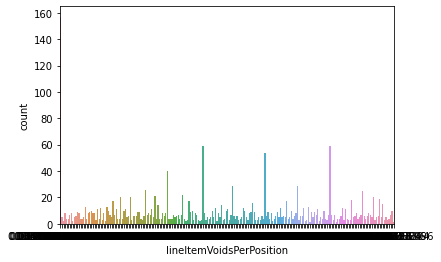

In [ ]:
sns.countplot(x = 'lineItemVoidsPerPosition', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


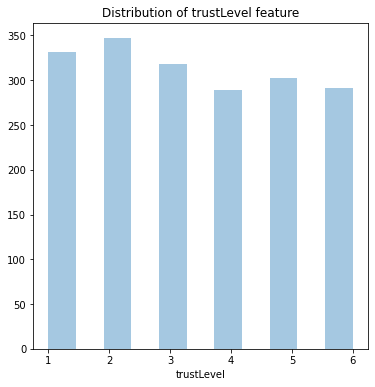

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of trustLevel feature")
sns.distplot(df.trustLevel, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


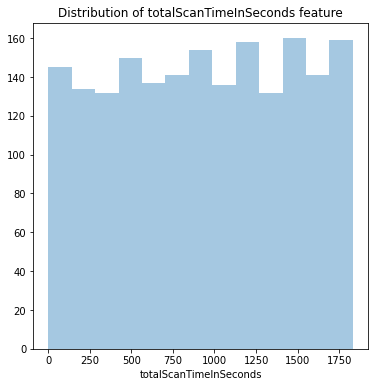

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of totalScanTimeInSeconds feature")
sns.distplot(df.totalScanTimeInSeconds, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


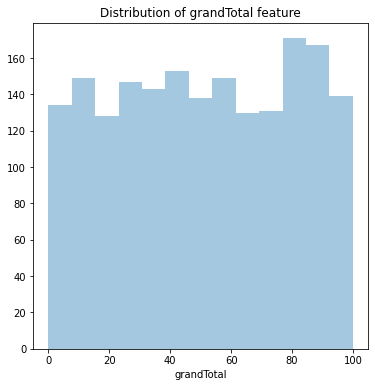

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of grandTotal feature")
sns.distplot(df.grandTotal, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


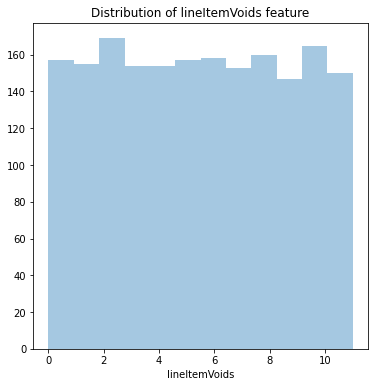

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of lineItemVoids feature")
sns.distplot(df.lineItemVoids, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


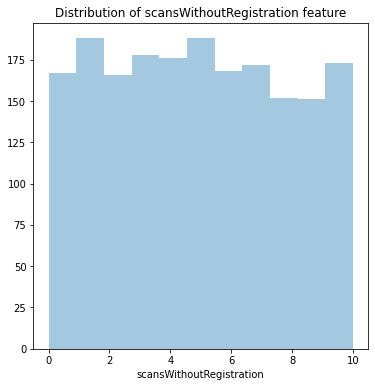

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of scansWithoutRegistration feature")
sns.distplot(df.scansWithoutRegistration, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


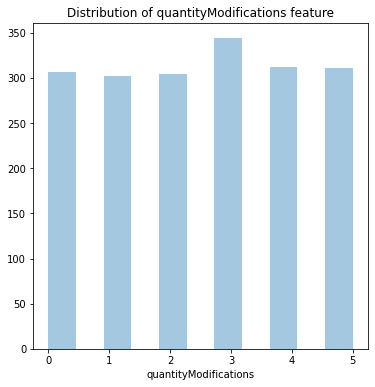

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of quantityModifications feature")
sns.distplot(df.quantityModifications, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


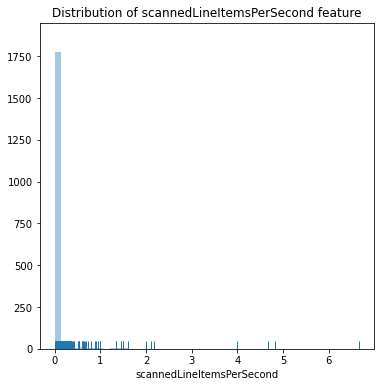

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of scannedLineItemsPerSecond feature")
sns.distplot(df.scannedLineItemsPerSecond, kde=False, rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


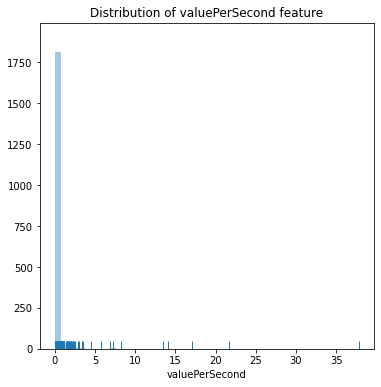

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of valuePerSecond feature")
sns.distplot(df.valuePerSecond, kde=False, rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


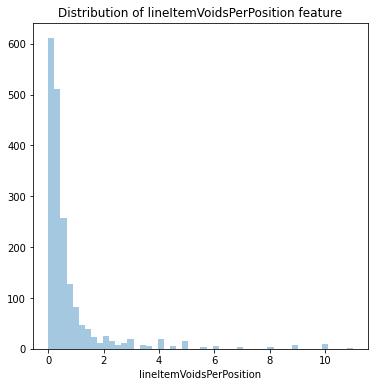

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Distribution of lineItemVoidsPerPosition feature")
sns.distplot(df.lineItemVoidsPerPosition, kde=False, rug=False)

<Figure size 7200x7200 with 0 Axes>

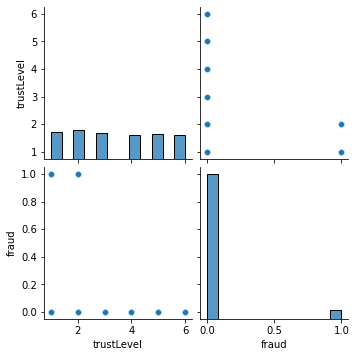

In [ ]:
#correlation between  trustlevel and fraud

plt.figure(figsize=(100, 100))
df_train_nona= df[df['fraud'].notnull()]
g = sns.pairplot(df_train_nona[['trustLevel', 'fraud']] )

###Check outliers

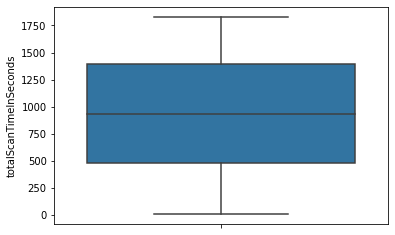

In [ ]:
sns.boxplot(y=df["totalScanTimeInSeconds"])

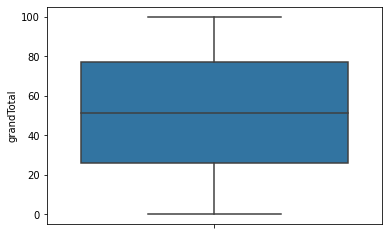

In [ ]:
sns.boxplot(y=df["grandTotal"])

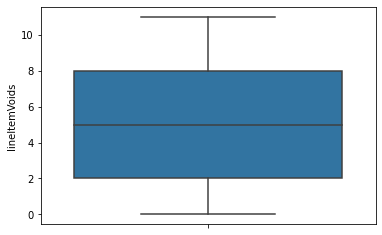

In [ ]:
sns.boxplot(y=df["lineItemVoids"])

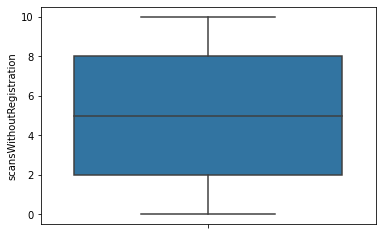

In [ ]:
sns.boxplot(y=df["scansWithoutRegistration"])

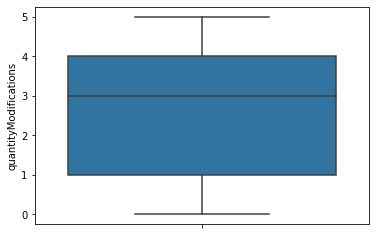

In [ ]:
sns.boxplot(y=df["quantityModifications"])

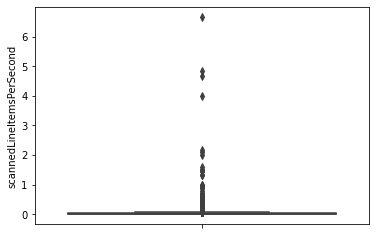

In [ ]:
sns.boxplot(y=df["scannedLineItemsPerSecond"])

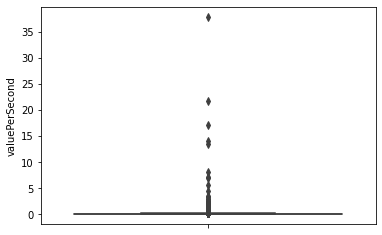

In [ ]:
sns.boxplot(y=df["valuePerSecond"])

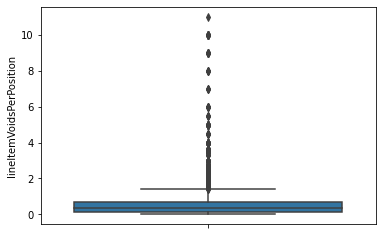

In [ ]:
sns.boxplot(y=df["lineItemVoidsPerPosition"])

Outliers merupakan titik data yang nilainya sangat ekstrim atau berbeda dengan nilai data lainnya. Untuk mendeteksi outlier dapat menggunakan boxplot. Terdapat outliers pada 3 kolom, yaitu scannedLineItemsPerSecond, valuePerSecond, lineItemVoidsPerPosition. 

Namun karena ini adalah permasalahan untuk mendeteksi transaksi mana yang merupakan fraud (penggelapan), outliers merupakan data yang penting karena ketika ada titik data yang memiliki nilai ekstrim tersebut bisa saja merupakan fraud tersebut. Misalnya ketika pembeli rata-rata melakukan scanning sebanyak 2-5 menit, maka ketika ada seorang pembeli yang melakukan scanning dalam 15 menit kemungkinan transaksi itu fraud sangatlah tinggi. Untuk itu outliers tetap dibiarkan saja dan tidak dihilangkan.


##Feature Engineering

In [ ]:
df[df.fraud == 1]['trustLevel'].value_counts()

1    89
2    15
Name: trustLevel, dtype: int64

In [ ]:
df[df.fraud == 1]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1
37,2,1397,62.59,7,9,4,0.017895,0.044803,0.280000,1
53,1,1385,34.68,5,8,4,0.019495,0.025040,0.185185,1
91,1,996,71.94,7,0,1,0.027108,0.072229,0.259259,1
97,2,1305,87.65,7,8,4,0.021456,0.067165,0.250000,1
...,...,...,...,...,...,...,...,...,...,...
1822,2,1689,13.70,8,1,1,0.017762,0.008111,0.266667,1
1838,1,1465,58.95,10,0,2,0.017065,0.040239,0.400000,1
1852,1,801,73.63,6,1,4,0.034956,0.091923,0.214286,1
1857,1,1400,59.43,3,6,2,0.016429,0.042450,0.130435,1


In [ ]:
X = df.iloc[:,:9]
y = df.iloc[:,9:]

###Feature creation

We will create new feature to know how many total item customer get.

In [ ]:
#feature creation

X['totalItem'] = X['totalScanTimeInSeconds']*X['scannedLineItemsPerSecond']

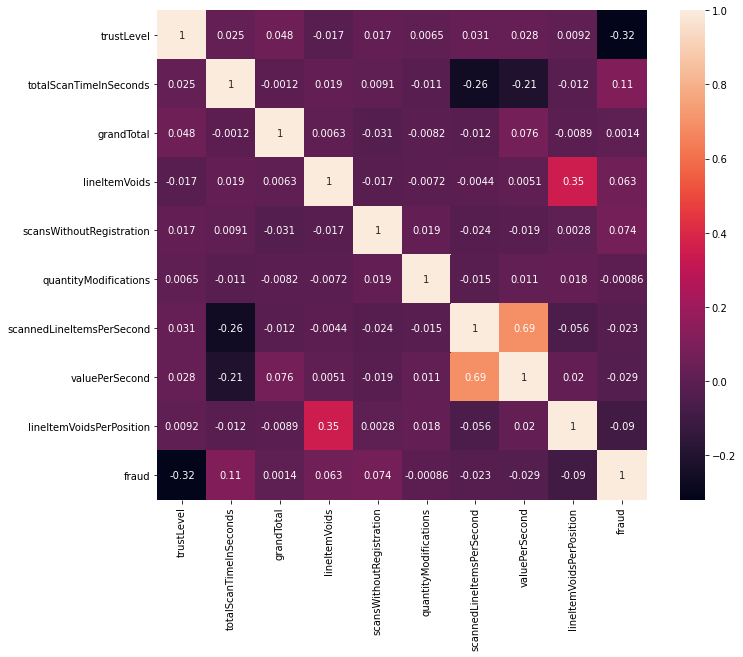

In [ ]:
#correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True)

Untuk melihat korelasi antar fitur digunakan perhitungan pearson correlation. Pearson correlation akan menghitung apakah antar fitur memiliki korelasi dengan kelas sehingga nanti memudahkan untuk memilih fitur untuk dimasukkan ke dalam model. Nilai pearson correlation berkisar dari -1 hingga 1. Jika nilai mendekati 0 maka hampir tidak ada korelasi. Jika nilai mendekati -1 adanya korelasi yang berkebalikan. Jika nilainya mendekati satu maka sangat berkorelasi.

In [ ]:
#choose feature to input to the algorithm
X = X[['trustLevel','totalItem','lineItemVoids',
       'scansWithoutRegistration','totalScanTimeInSeconds']]

In [ ]:
X.head()

,trustLevel,totalItem,lineItemVoids,scansWithoutRegistration,totalScanTimeInSeconds
0,5,29.0,7,0,1054
1,3,14.0,5,2,108
2,3,13.0,3,10,1516
3,6,29.0,8,4,1791
4,5,27.0,3,7,430


###Train test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

###Standarization

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)
X_train = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_val = pd.DataFrame(X_val_sc, columns=X_val.columns)
X_train.head()

,trustLevel,totalItem,lineItemVoids,scansWithoutRegistration,totalScanTimeInSeconds
0,1.535330,-0.277636,-0.144050,-1.243991,1.609732
1,-0.238383,-1.546334,0.724295,0.675309,0.914537
2,0.352854,-1.084989,0.724295,1.634959,-0.919795
3,-0.829621,-1.315661,-0.433499,1.315076,1.451046
4,1.535330,0.991063,0.434847,1.315076,-0.124477


Standarisasi menskalakan setiap variabel input secara terpisah dengan mengurangi mean dan membaginya dengan deviasi standar untuk menggeser distribusi agar memiliki mean nol dan deviasi standar satu. StandardScaler digunakan dalam proses ini.

In [ ]:
X_test = pd.read_csv('/content/DMC_2019_task/test.csv',sep='|')

#feature creation
X_test['totalItem'] = X_test['totalScanTimeInSeconds']*X_test['scannedLineItemsPerSecond']
X_test = X_test[['trustLevel','totalItem','lineItemVoids',
       'scansWithoutRegistration','totalScanTimeInSeconds']]
X_test.head()

,trustLevel,totalItem,lineItemVoids,scansWithoutRegistration,totalScanTimeInSeconds
0,4,7.0,4,8,467
1,3,27.0,7,6,1004
2,1,1.0,4,5,162
3,5,14.0,9,3,532
4,5,19.0,4,0,890


In [ ]:
X_test.shape

(498121, 5)

In [ ]:
y_test = pd.read_csv('/content/DMC-2019-realclass.csv')
y_test.head()

,fraud
0,0
1,0
2,0
3,0
4,0


#Modelling

In [ ]:
print('Logistic Regression\n')

#Create Logistic Regression and Train the model using the training sets
lrc = LogisticRegression(random_state=0).fit(X, y.values.ravel())

#Predict the response for test dataset
lrc_pred = lrc.predict(X_test)

results = confusion_matrix(y_test, lrc_pred)
print('Confusion Matrix :')
print(results) 
print('Report : ')
print(classification_report(y_test, lrc_pred))
tn, fp, fn, tp = confusion_matrix(y_test, lrc_pred).ravel()
print('True Negative: ',tn)
print('False Positive: ',fp)
print('True Positive: ',tp)
print('False Negative: ',fn)
print()
print('Precision Score: ',precision_score(y_test, lrc_pred))
print()
print('Profit: ',(tp*5)+(tn*0)+(fp*-25)+(fn*-5))

Logistic Regression



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix :
[[472255   2139]
 [  2486  21241]]
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    474394
           1       0.91      0.90      0.90     23727

    accuracy                           0.99    498121
   macro avg       0.95      0.95      0.95    498121
weighted avg       0.99      0.99      0.99    498121

True Negative:  472255
False Positive:  2139
True Positive:  21241
False Negative:  2486

Precision Score:  0.9085115483319076

Profit:  40300


In [ ]:
print('Adaboost\n')
# Create Adaboost Classifier with neighbours = 4
adb = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X, y)

#Predict the response for test dataset
adb_pred = adb.predict(X_test)

results = confusion_matrix(y_test, adb_pred)
print('Confusion Matrix :')
print(results) 
print('Report : ')
print(classification_report(y_test, adb_pred))
# print('F1 Score: ',f1_score(y_test, adb_pred, average='macro'))
tn, fp, fn, tp = confusion_matrix(y_test, adb_pred).ravel()
print('TN: ',tn)
print('FP: ',fp)
print('TP: ',tp)
print('FN: ',fn)
print('Profit: ',(tp*5)+(tn*0)+(fp*-25)+(fn*-5))

Adaboost



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix :
[[471742   2652]
 [  2473  21254]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474394
           1       0.89      0.90      0.89     23727

    accuracy                           0.99    498121
   macro avg       0.94      0.95      0.94    498121
weighted avg       0.99      0.99      0.99    498121

TN:  471742
FP:  2652
TP:  21254
FN:  2473
Profit:  27605


In [ ]:
print('Random Forest Classifier\n')

#Create Random Forest Classifier and Train the model using the training sets
rfc = RandomForestClassifier(n_estimators=20).fit(X, y)

#Predict the response for test dataset
rfc_pred = rfc.predict(X_test)

results = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix :')
print(results) 
print('Report : ')
print(classification_report(y_test, rfc_pred))
print('F1 Score: ',f1_score(y_test, rfc_pred, average='macro'))
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
print('TN: ',tn)
print('FP: ',fp)
print('TP: ',tp)
print('FN: ',fn)
print('Profit: ',(tp*5)+(tn*0)+(fp*-25)+(fn*-5))

Random Forest Classifier



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Confusion Matrix :
[[471908   2486]
 [  5883  17844]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474394
           1       0.88      0.75      0.81     23727

    accuracy                           0.98    498121
   macro avg       0.93      0.87      0.90    498121
weighted avg       0.98      0.98      0.98    498121

F1 Score:  0.9006261393548762
TN:  471908
FP:  2486
TP:  17844
FN:  5883
Profit:  -2345


Setelah melakukan beberapa percobaan menggunakan algoritma Logistic Regression, Random Forest dan AdaBoost ternyata algoritma Logistic Regression  dapat mengklasifikasikan data dengan tepat. Sehingga dipilih model yang menggunakan Logistic Regression. Logistic Regression biasanya digunakan untuk klasifikasi  biner dengan 2 output. Fungsi sigmoid digunakan dalam Logistic Regression untuk menentukan kelas pada data. Logistic Regression merupakan algoritma yang sering digunakan dan simple. Probabilitas digunakan dalam Logistic Regression untuk menentukan suatu data termasuk ke kelas mana. Fungsi sigmoid akan digunakan untuk menghitung probabilitas data yang berkisar antara 0 hingga 1. Jika probabilitas data tersebut > 50% maka akan dimasukkan ke kelas positif (1) begitu juga sebaliknya.
